In [1]:
import pandas as pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#load data from folder
data = pandas.read_excel("TitanicAnalysis\data\dataSophie.xlsx")

# Replace unanswered questions with 'none'
data.replace(np.nan, 'None', regex=True)

# Only interested in row 1-999 and columns 19-999 
# AKA skip first row (question text) and first 19 columns (misc. info)
data = data.iloc[1:999, 19:999]


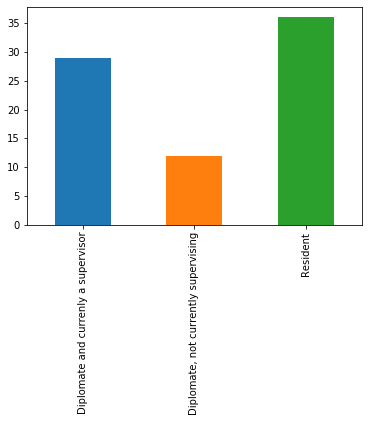

In [10]:
# HISTOGRAM 

# Sla de data van vraag 1 op in een var genaamd 'Q1'
Q1 = data["Q1"]

# Maak er categorieën van
categories = pandas.Categorical(Q1)

#bar plot die shit aha
categories.value_counts().plot(kind='bar',  color=['C0', 'C1', 'C2'])


C:\Users\frans\miniconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


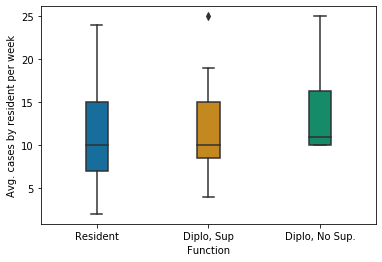

In [7]:
#BOXPLOT

# Boxplot heeft twee dimensies (columns) nodig, x en y
# in dit geval houdt combi de columns Q1 en Q60_1 vast (een numerieke en een categoriaal)
combi = data[["Q1", "Q60_1"]]


# Optioneel: Verkort de namen van iedere categorie om 'm iets leesbaarder
# te maken. Je kan ook groepen maken (A, B,C of 1, 2, 3) en een legenda provide
combi.replace({'Diplomate and currenly a supervisor': 'Diplo, Sup', 'Diplomate, not currently supervising': 'Diplo, No Sup.'}, inplace=True)

# Knal er een boxplot uit. Bij y en x geef je de column naam aan,
# bij data de gehele dataset waaruit deze columns getrokken moeten worden aha
bplot = sns.boxplot(y='Q60_1', x='Q1', 
                 data=combi, 
                 width=0.2,
                 palette="colorblind").set(xlabel='Function', ylabel = 'Avg. cases by resident per week')

